In [11]:
#Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
from matplotlib.pyplot import legend

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])  # converting job_posted_date to datetime object
df['job_skills'] = df['job_skills'].apply(lambda data: ast.literal_eval(data) if pd.notna(data) else data)  # converting job_skills to list

# Examples

In [12]:
df_DA = df[df['job_title_short'] == 'Data Analyst']
df_exploded = df_DA.explode('job_skills')

In [13]:
skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'),
    median_salary=('salary_year_avg', 'median'),
)

In [14]:
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(10)

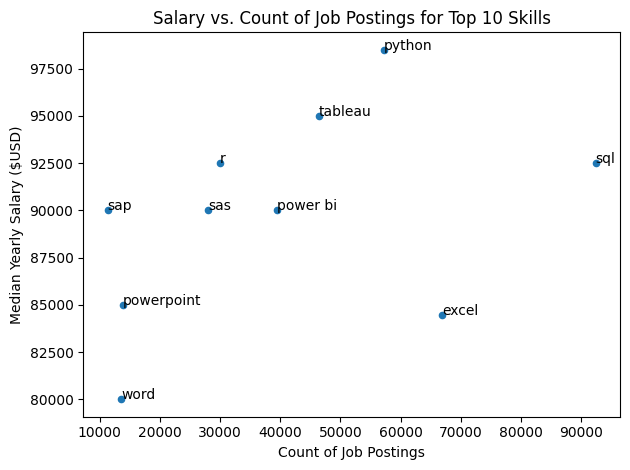

In [15]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.tight_layout()

for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)

plt.show()

# Exercises

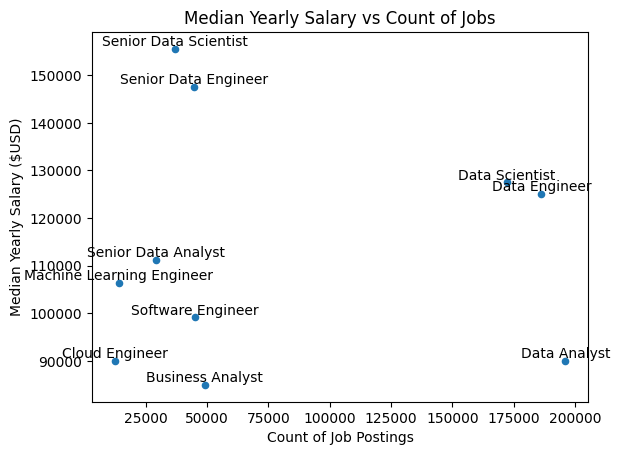

In [38]:
# Create a scatter plot to compare the median yearly salary and the number of jobs based on the job_title_short column.
# To create the scatter plot first create a new DataFrame using the groupby() method to aggregate and find the median salary and job count for each job title.
# Annotate each point with the job title name.
# 
df_grouped = df.groupby('job_title_short').agg(
    median_salary=('salary_year_avg', 'median'),
    count=('job_title_short', 'count'),
).dropna()

df_grouped.plot(kind='scatter', x='count', y='median_salary')
plt.title('Median Yearly Salary vs Count of Jobs')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary ($USD)')

for i in range(len(df_grouped)):
    plt.text(df_grouped['count'].iloc[i], df_grouped['median_salary'].iloc[i], df_grouped.index[i], ha='center', va='bottom')

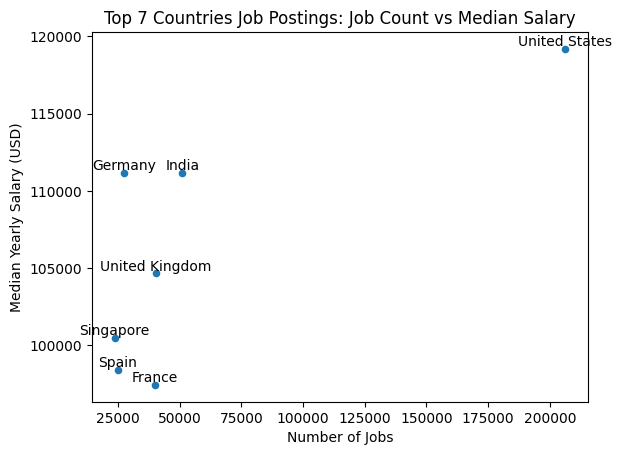

In [59]:
# Create a scatter plot to visualize the relationship between the number of job postings and median yearly salary for the top 7 countries based on highest number of job postings. 
# Annotate each point with the country's name.

df_salary_country = df.groupby('job_country').agg(
    median_yearly_salary=('salary_year_avg', 'median'),
    job_postings=('job_country', 'count'),
).dropna().sort_values(by='job_postings', ascending=False).head(7)

df_salary_country.plot(kind='scatter', x='job_postings', y='median_yearly_salary')
plt.xlabel('Number of Jobs')
plt.ylabel('Median Yearly Salary (USD)')
plt.title('Top 7 Countries Job Postings: Job Count vs Median Salary')

for i in range(len(df_salary_country)):
    plt.text(df_salary_country['job_postings'].iloc[i], df_salary_country['median_yearly_salary'].iloc[i], df_salary_country.index[i], ha='center', va='bottom')

plt.show()


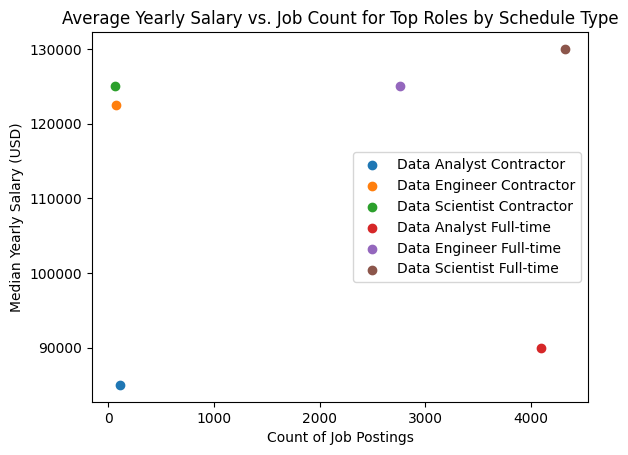

In [81]:
# Create a scatter plot to visualize the relationship between the average yearly salary and the job count filtering a DataFrame for:
# Data Analyst, Data Scientist, and Data Engineer positions in job_title_short
# United States for the job_country
# 'Full-time' and 'Contractor' for the job_schedule_type
# Remove roles that do not have any yearly salary data.

# Combine the job_title_short and job_schedule_type into one column (called job_title_type) in the newly created DataFrame to use as the labels for the plot.
# For the plot use a for loop to cycle through the unique values in job_title_type and plot using the plt.scatter() function, specifying the label of job_title_type.
# Ensure the legend is appearing.
# Label the plot's axis and title appropriately.

target_job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']
job_schedule_type = ['Full-time', 'Contractor']

df_filtered = df[(df['job_title_short'].isin(target_job_titles)) & (df['job_schedule_type'].isin(job_schedule_type)) & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg']).copy()

df_grouped = df_filtered.groupby(['job_schedule_type', 'job_title_short']).agg(
    median_salary=('salary_year_avg', 'median'),
    job_count=('job_title_short', 'count'),
).dropna().reset_index()

df_grouped['job_title_type'] = df_grouped['job_title_short'] + ' ' + df_grouped['job_schedule_type']

for job_title_type in df_grouped['job_title_type'].unique():
    subset = df_grouped[df_grouped['job_title_type'] == job_title_type]
    plt.scatter(subset['job_count'], subset['median_salary'], label=job_title_type)

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary (USD)')
plt.title('Average Yearly Salary vs. Job Count for Top Roles by Schedule Type')
plt.legend()
plt.show()